In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-05-26 18:33:43.508392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 18:33:43.508504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 18:33:43.680609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)
print("X test shape:", x_test.shape)
print("Y test shape:", y_test.shape)

X train shape: (60000, 28, 28)
Y train shape: (60000,)
X test shape: (10000, 28, 28)
Y test shape: (10000,)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

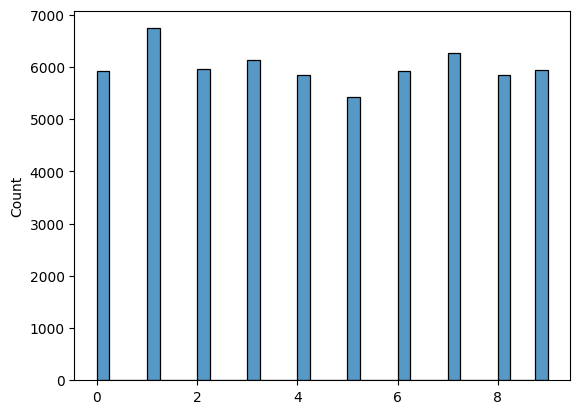

In [4]:
sns.histplot(y_train)

In [5]:
input_shape = (28,28,1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [6]:
print("X train shape:", x_train.shape)
print("X test shape:", x_test.shape)

X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [8]:
print("Y train shape:", y_train.shape)
print("Y test shape:", y_test.shape)

Y train shape: (60000, 10)
Y test shape: (10000, 10)


9


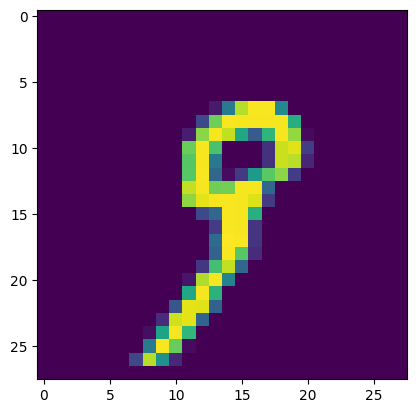

In [9]:
index = 19
print(np.argmax(y_train[index]))
plt.imshow(x_train[index][:,:,:])

In [21]:
batch_size = 10
epochs = 20
classes = 10

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='tanh', input_shape=input_shape),
#     tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (5,5), activation='tanh'),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation='softmax')
])

##Learning: Sparse Categorical Entropy loss is used when the target variable isn't one hot encoded, else use categorical cross entropy loss
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,622 (135.24 KB)

 Trainable params: 34,622 (135.24 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [31]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8957 - loss: 0.3523 - val_accuracy: 0.9747 - val_loss: 0.0930
Epoch 2/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9748 - loss: 0.0813 - val_accuracy: 0.9825 - val_loss: 0.0621
Epoch 3/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9829 - loss: 0.0563 - val_accuracy: 0.9847 - val_loss: 0.0585
Epoch 4/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9871 - loss: 0.0393 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 5/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9858 - val_loss: 0.0571
Epoch 6/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9875 - val_loss: 0.0533
Epoch 7/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9853 - val_loss: 0.0555
Epoch 8/20
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9936 - loss: 0

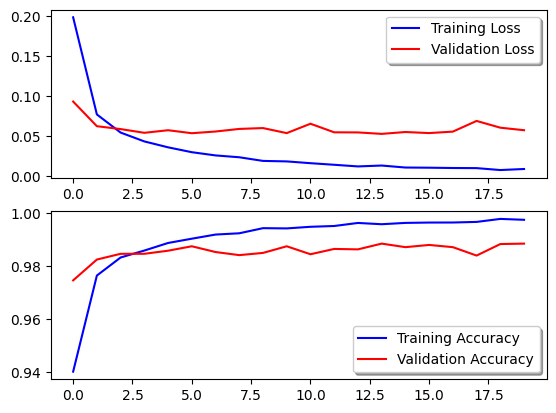

In [35]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0603
